# Project: Student Performance Prediction  
**🎯 Goal:** Predict students' final grade (G3) based on demographic, social, and academic data.  
**📊 Dataset:** UCI Student Performance Dataset (`student-mat.csv`)  
**👨‍💻 Created by:** M Brahmanaidu  
**🕒 Date:** November 2025

##  1. Import Required Libraries

In [3]:
# Import essential Python libraries for data handling, visualization, and modeling

import pandas as pd                # Data manipulation and analysis
import numpy as np                 # Numerical operations
import matplotlib.pyplot as plt    # Data visualization
import seaborn as sns              # Statistical data visualization

# Scikit-learn tools for machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For saving trained model
import joblib


> 📝 **Explanation of Imported Libraries**

- **`pandas`** → Reading and cleaning data  
- **`seaborn` / `matplotlib`** → Plotting and visualizations  
- **`scikit-learn`** → Building, training, and evaluating ML models  
- **`joblib`** → Saving models for reuse

##  2. Load the Dataset

In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('D:\Projects\ML_Projects\student_performance_project\data/student-por.csv')
# df = pd.read_csv('data/student-mat.csv') # Use your file path 

# Display the first 5 rows to understand data structure
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 4. Data Exploration

In [13]:
# Check shape (rows, columns)
print("Dataset shape:", df.shape)

# Overview of dataset info
df.info()

Dataset shape: (649, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null 

In [10]:
# Basic statistical summary of numeric columns
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [11]:

# Check if there are missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

>  **Exploratory Data Overview**

- **`.info()`** → Displays column names, non-null counts, and data types  
- **`.describe()`** → Summarizes central tendency and spread (mean, median, std, etc.)  
- **`.isnull().sum()`** → Checks for missing values (UCI datasets typically have none)

 ## 5.Exploratory Data Analysis(EDA)

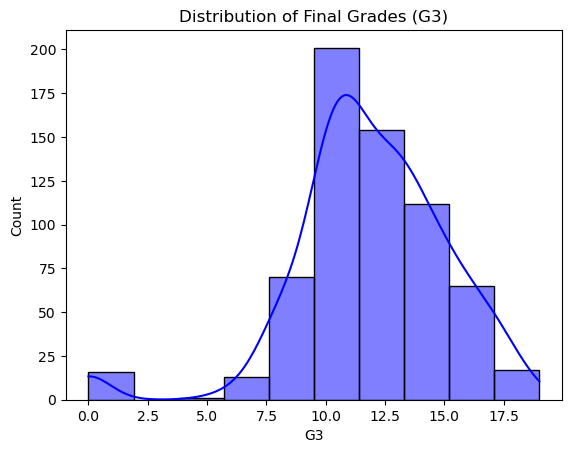

In [15]:
# Visualize the distribution of final grade (target variable)
sns.histplot(df['G3'], kde=True, bins=10, color='blue')
plt.title("Distribution of Final Grades (G3)")
plt.show()

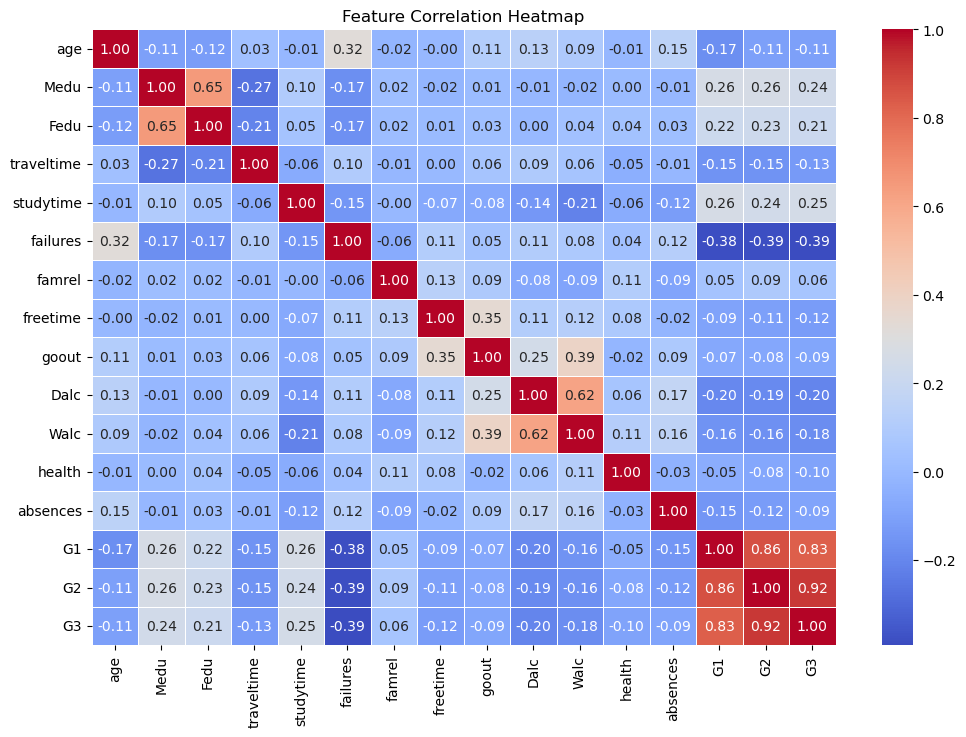

In [18]:
# Select only numeric columns to avoid ValueError
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


>  **Correlation Heatmap Insights**

- Reveals strong relationships between features  
  → *Example: `G1` and `G2` are highly correlated with `G3` (final grade)*  
- Helps identify which features most influence student performance  
- Useful for feature selection and understanding model behavior

## 5. Data Preprocessing
 #### (a)Encode Categorical Variables

In [22]:
# Find all categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", cat_cols.tolist())

# Convert categorical columns to numeric using Label Encoding
label_enc = LabelEncoder()
for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])


Categorical Columns: []


>  **Label Encoding Explained**

- Converts text categories into unique numeric values  
  → *Example: `"male"` → `1`, `"female"` → `0`*  
- Enables machine learning models to process categorical data  
- Commonly used for binary and nominal features before training

#### (b) Feature and Target Separation

In [24]:
# Separate features (X) and target (y)
X = df.drop('G3', axis=1)
y = df['G3']


 - Users oftern confuse here
| Variable | Description | Target Column |
|----------|-------------|----------------|
| `X`      | Features     | Excludes `G3`  |
| `y`      | Target       | Only `G3`      |

#### (c) Feature Scaling

In [26]:
# Standardize numerical features (important for regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier viewing
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


>  **Feature Scaling Explained**

- Normalizes all features to a similar range (typically mean = 0, standard deviation = 1)  
- Prevents variables with larger scales (e.g., `absences`) from dominating those with smaller scales (e.g., `studytime`)  
- Essential for algorithms sensitive to feature magnitude, like KNN, SVM, and gradient descent-based models

 **For the clear understanding**

| Step                | Purpose                                      | Output Format        |
|---------------------|----------------------------------------------|----------------------|
| `StandardScaler()`  | Initializes the scaler for standardization   | Scaler object        |
| `.fit_transform(X)` | Applies scaling (mean=0, std=1) to features  | NumPy array          |
| `pd.DataFrame(...)` | Converts array back to DataFrame with labels | pandas DataFrame     |

## 6.Train-Test-split

In [28]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 519
Testing samples: 130


- Explanation

We train the model on **80%** of data and test it on **20%** unseen data.

## 7. Model Training (Linear Regression)

In [31]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to training data
model.fit(X_train, y_train)

# Display model coefficients
print("Model Intercept:", model.intercept_)
print("Number of features:", len(model.coef_))


Model Intercept: 11.92320151656559
Number of features: 32


###  Model Training: Linear Regression

Linear Regression fits a linear equation to the training data to model the relationship between input features and the target variable.

####  What Happens During Training

- **Initialization**  
  A `LinearRegression()` object is created to represent the model.

- **Fitting**  
  `model.fit(X_train, y_train)` computes the optimal weights (coefficients) and bias (intercept) that minimize the residual sum of squares between predicted and actual values.

- **Model Equation**  
  Instead of showing the full math here, you can explore the equation and its components in detail at this excellent resource:  
  🔗 [Linear Regression Formula & Interpretation – GeeksforGeeks](https://www.geeksforgeeks.org/maths/linear-regression-formula/)

####  Output Inspection

- `model.intercept_`: The bias term \( b \)  
- `model.coef_`: Array of weights for each feature  
- `len(model.coef_)`: Number of features used in the model


## 8. Model Prediction & Evaluation

In [35]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.2f}") 

MAE (Mean Absolute Error): 0.76
RMSE (Root Mean Squared Error): 1.20
R² Score: 0.85


 **Explanation**

- **MAE (Mean Absolute Error)** → Average absolute difference between predicted and actual grades  
- **RMSE (Root Mean Squared Error)** → Penalizes large errors more heavily  
- **R² Score (Coefficient of Determination)** → Indicates how well the model explains the data (ranges from **0 to 1**)


## 9. Visualization: Actual vs Predicted

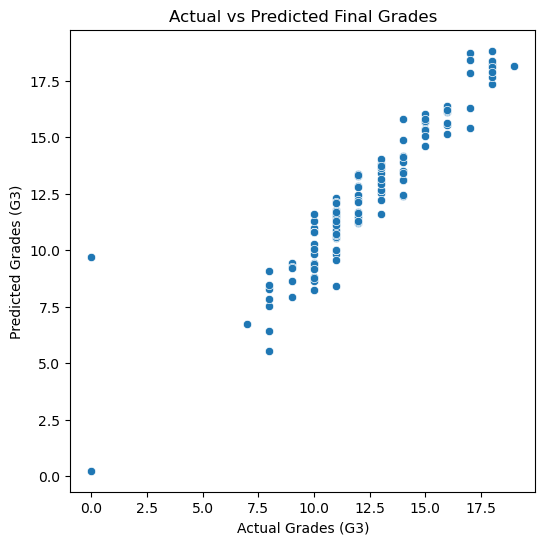

In [39]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Grades (G3)")
plt.ylabel("Predicted Grades (G3)")
plt.title("Actual vs Predicted Final Grades")
plt.show()

### Explanation:
- This scatter plot shows the actual grades vs predicted grades.  
- **`If the points are close to the diagonal line, the model is predicting well.`**  
- Points far from the line show larger prediction errors.  
- It helps to see how accurate the model’s predictions are.

🔗 **Learn more about scatter plots:** [Scatter Plot Explanation (Khan Academy)](https://www.khanacademy.org/math/statistics-probability/displaying-describing-data/scatterplots/a/scatterplots-review)

## 10. Feature Importance

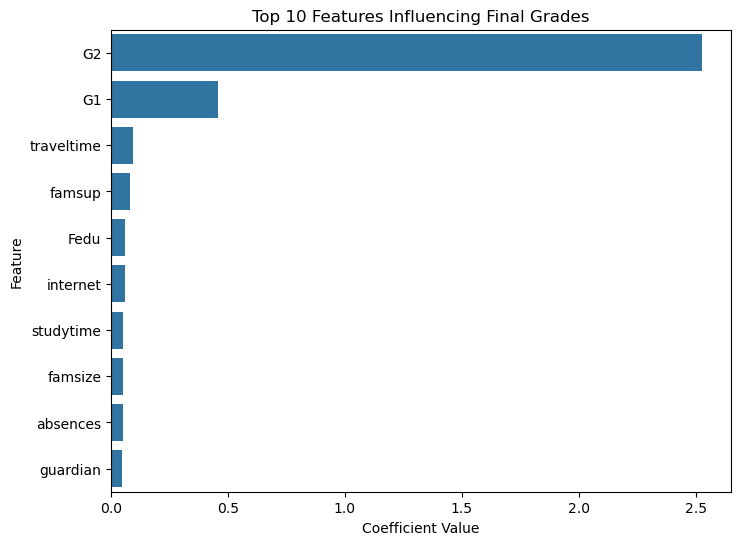

In [41]:
# Get feature importance (regression coefficients)
importance = pd.Series(model.coef_, index=X.columns)
top_features = importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Features Influencing Final Grades")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

### Observation:
This bar chart shows the **top 10 features** that have the strongest influence on the final grades (G3).  
Each bar represents a feature, and the **length of the bar (coefficient value)** indicates how strongly that feature affects the grade.  
Positive values mean the feature increases the predicted grade, while negative values mean it decreases the predicted grade.  

`Typically, **G1**, **G2**, and **studytime** have the highest positive influence on the final grade (G3)`.  

🔗** [Feature Importance in Machine Learning (Towards Data Science)](https://towardsdatascience.com/feature-importance-and-feature-selection-8af4b06b8e9e)


## 11. Save the Model

In [45]:
# Save the trained model for reuse
import joblib
joblib.dump(model, r'D:\Projects\ML_Projects\student_performance_project\outputs\model.pkl')

#joblib.dump(model, 'outputs/model.pkl') "Use your pathfile"

print("✅ Model saved successfully as model.pkl")


✅ Model saved successfully as model.pkl



- This step saves the trained model as a `.pkl` file so it can be reused later without retraining.  
- By saving the model, you can quickly load it again to make predictions on new data, saving time and computing resources.
** [Joblib Documentation – Persistence of NumPy Arrays](https://joblib.readthedocs.io/en/latest/persistence.html)


In [51]:
import os

# Ensure the 'outputs' folder exists
os.makedirs('outputs', exist_ok=True)

# Save performance report
with open('outputs/performance_report.txt', 'w') as f:
    f.write("Student Performance Prediction Report\n")
    f.write(f"MAE: {mae:.2f}\n")
    f.write(f"RMSE: {rmse:.2f}\n")
    f.write(f"R² Score: {r2:.2f}\n")

print("✅ Report saved successfully!")


✅ Report saved successfully!
